### Importing pandas library


In [230]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn import preprocessing
from sklearn import metrics, tree
import warnings
warnings.filterwarnings('ignore')

In [122]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

### Data Loading and Reading

In [2]:
# Loading data into Data source 
from google.colab import files
uploaded = files.upload()

Saving DS3_C6_S2_Classification_HouseGrade_Data_Project.csv to DS3_C6_S2_Classification_HouseGrade_Data_Project.csv


In [3]:
import io
house = pd.read_csv(io.BytesIO(uploaded['DS3_C6_S2_Classification_HouseGrade_Data_Project.csv']))
house.head()

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
0,1,339,6,5,4,6,NO,0,76,2,79,6,3481,D
1,2,358,5,4,3,4,YES,71,96,3,72,4,3510,D
2,3,324,7,5,4,5,YES,101,117,5,64,3,3748,C
3,4,330,6,4,3,5,YES,101,82,2,59,2,3134,D
4,5,320,7,4,4,5,NO,0,75,3,40,1,3843,D


### Data Overview

In [4]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              3000 non-null   int64 
 1   Area(total)     3000 non-null   int64 
 2   Trooms          3000 non-null   int64 
 3   Nbedrooms       3000 non-null   int64 
 4   Nbwashrooms     3000 non-null   int64 
 5   Twashrooms      3000 non-null   int64 
 6   roof            3000 non-null   object
 7   Roof(Area)      3000 non-null   int64 
 8   Lawn(Area)      3000 non-null   int64 
 9   Nfloors         3000 non-null   int64 
 10  API             3000 non-null   int64 
 11  ANB             3000 non-null   int64 
 12  Expected price  3000 non-null   int64 
 13  Grade           3000 non-null   object
dtypes: int64(12), object(2)
memory usage: 328.2+ KB


In [6]:
house.describe()

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000
mean,1500.500000,325.117000,7.021667,5.023000,4.513667,6.010667,48.980667,95.609333,4.013333,70.190667,3.47900,3782.938333
std,866.169729,20.507742,1.421221,1.634838,1.715263,1.786136,48.746641,14.837388,1.621532,17.563460,1.69426,567.189995
min,1.000000,290.000000,5.000000,2.000000,1.000000,2.000000,0.000000,70.000000,1.000000,40.000000,1.00000,2504.000000
25%,750.750000,308.000000,6.000000,4.000000,3.000000,5.000000,0.000000,83.000000,3.000000,55.000000,2.00000,3354.000000
50%,1500.500000,325.000000,7.000000,5.000000,4.000000,6.000000,71.000000,96.000000,4.000000,70.000000,4.00000,3771.000000
75%,2250.250000,343.000000,8.000000,6.000000,6.000000,7.000000,96.000000,109.000000,5.000000,85.000000,5.00000,4208.000000
max,3000.000000,360.000000,9.000000,8.000000,8.000000,10.000000,120.000000,120.000000,7.000000,100.000000,6.00000,5216.000000


In [7]:
house.describe(include='object')

,roof,Grade
count,3000,3000
unique,2,5
top,YES,D
freq,1543,1270


In [8]:
house.isnull().sum()

Id                0
Area(total)       0
Trooms            0
Nbedrooms         0
Nbwashrooms       0
Twashrooms        0
roof              0
Roof(Area)        0
Lawn(Area)        0
Nfloors           0
API               0
ANB               0
Expected price    0
Grade             0
dtype: int64



1.   We have total 5000 observation for each column
2.   All columns are numerical except for roof and Grade
1.   There are 0 null values in our data
2.   ID column is of no use here ,so we can drop that






In [9]:
house.drop(['Id'], axis=1, inplace=True)
house.head()

,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
0,339,6,5,4,6,NO,0,76,2,79,6,3481,D
1,358,5,4,3,4,YES,71,96,3,72,4,3510,D
2,324,7,5,4,5,YES,101,117,5,64,3,3748,C
3,330,6,4,3,5,YES,101,82,2,59,2,3134,D
4,320,7,4,4,5,NO,0,75,3,40,1,3843,D


### **Data Visualisation and Analysis**

Comparing Grades of house with and without roof 


<AxesSubplot:xlabel='roof'>

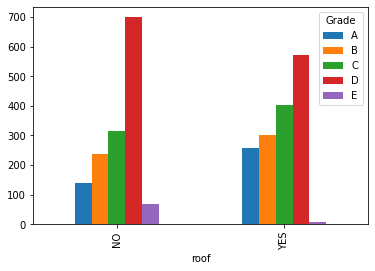

In [11]:
pd.crosstab(house['roof'],house['Grade']).plot(kind='bar') 

In each category of house plotting the count of room size available

<AxesSubplot:xlabel='Grade', ylabel='count'>

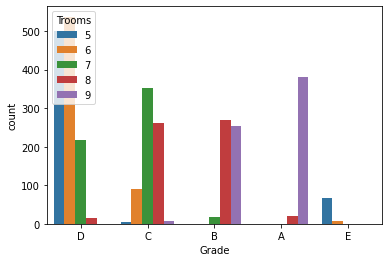

In [13]:
sns.countplot(data=house,x='Grade',hue='Trooms')

In each category of house plotting the count of floors available

<AxesSubplot:xlabel='Grade', ylabel='count'>

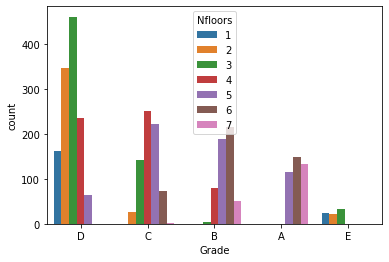

In [16]:
sns.countplot(data=house,x='Grade',hue='Nfloors')

Distribution of Area

<AxesSubplot:ylabel='Frequency'>

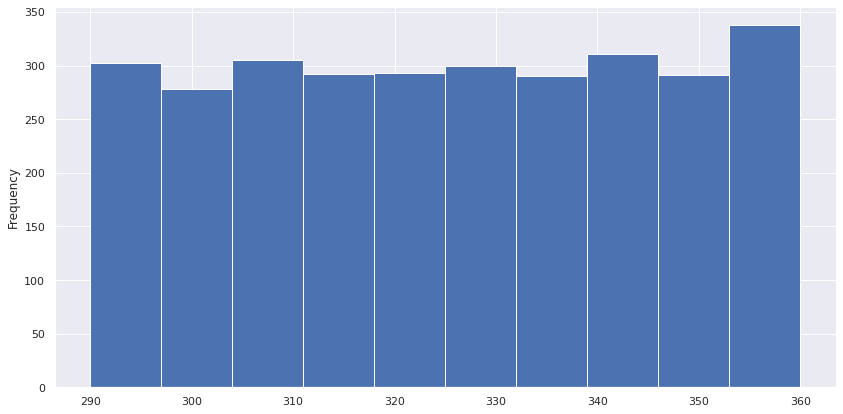

In [48]:
house["Area(total)"].plot(kind='hist')

####Plotting different graphs to check Frequency of Washrooms,bedrooms,Rooms and attached bathrooms

<AxesSubplot:xlabel='Trooms', ylabel='count'>

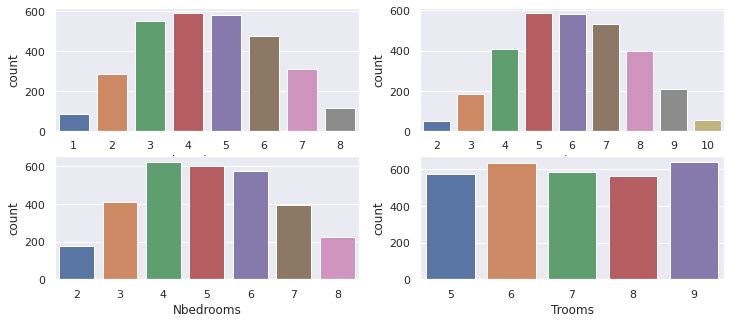

In [47]:
fig, axes = plt.subplots(2, 2)
sns.set(rc={'figure.figsize':(14,7)})
sns.countplot(data=house,x='Nbwashrooms', ax=axes[0,0])
sns.countplot(data=house,x='Twashrooms', ax=axes[0,1])
sns.countplot(data=house,x='Nbedrooms', ax=axes[1,0])
sns.countplot(data=house,x='Trooms', ax=axes[1,1])

####Visualising which house category have maximum no of house available

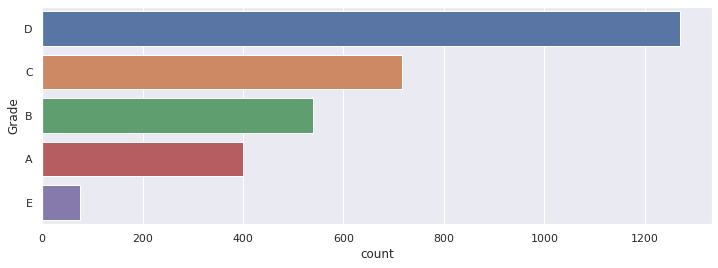

In [64]:
plt.figure(figsize=(12, 4))
sns.countplot(y=house.Grade, 
              data=house, 
              order=house.Grade.value_counts().index[:]);

#### **Observations**
```
-There are more grade of roof house then non roof houses
-D-grade have maximum types of room size available
-D-grade have maximum no of floors size available
-Area of house range from 290-360
-Category D have maximum no of house available```




**Data contains two categorical columns wwhcih we have to convert to int by Label Encoder**

### Data Preprocessing

In [65]:
enoder = preprocessing.LabelEncoder()
house['roof']= enoder.fit_transform(house['roof'])
house['Grade']= enoder.fit_transform(house['Grade'])

**Data Correlation**

<AxesSubplot:>

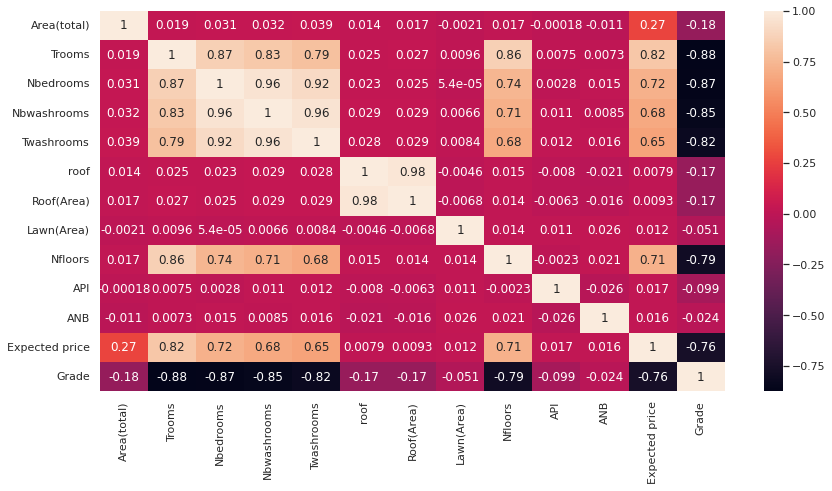

In [70]:
plt.figure(figsize=(14,7))
sns.heatmap(house.corr(),annot=True)

#### From the correlation we can see that 
**'Trooms', 'Nbedrooms', 'Nbwashrooms', 'Twashrooms' ,Nfloors and Expected price have the major impact on our Target column Grade**

### Data Scalling to bring our data in same range 

In [77]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
house_scaling=pd.DataFrame(scaler.fit_transform(house),columns=house.columns)
house_scaling

,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
0,0.677077,-0.718985,-0.014071,-0.299518,-0.005973,-1.029090,-1.004968,-1.321837,-1.241831,0.501655,1.488214,-0.532429,0.874159
1,1.603710,-1.422722,-0.625854,-0.882616,-1.125895,0.971733,0.451785,0.026334,-0.625028,0.103034,0.307560,-0.481292,0.874159
2,-0.054476,-0.015248,-0.014071,-0.299518,-0.565934,0.971733,1.067315,1.441914,0.608580,-0.352533,-0.282766,-0.061609,-0.025490
3,0.238145,-0.718985,-0.625854,-0.882616,-0.565934,0.971733,1.067315,-0.917385,-1.241831,-0.637262,-0.873093,-1.144319,0.874159
4,-0.249557,-0.015248,-0.625854,-0.299518,-0.565934,-1.029090,-1.004968,-1.389245,-0.625028,-1.719234,-1.463420,0.105911,0.874159
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.774617,1.392227,0.597712,0.283580,0.553988,0.971733,0.944209,1.307097,0.608580,1.128060,-0.873093,0.816550,-0.925139
2996,-1.615123,1.392227,1.821279,1.449776,1.113949,0.971733,1.375079,-0.580343,1.842187,1.526681,0.307560,-0.052792,-1.824789
2997,0.140604,-0.015248,-0.625854,-0.882616,-0.565934,-1.029090,-1.004968,-1.187019,0.608580,1.412789,1.488214,-0.310245,0.874159
2998,-1.566353,1.392227,1.209496,1.449776,1.113949,-1.029090,-1.004968,-1.187019,1.842187,-1.092829,-0.282766,0.731908,-0.925139


### Splitting the Data

In [78]:
X=house_scaling.drop('Grade',axis=1)
y=house['Grade']

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20) 

### **Using Different Classifier Models to choose for the best one**

###**Logistic Regression**
**Training the modal**

In [86]:
logreg=LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression()

**Model Prediction**

In [166]:
y_pred=logreg.predict(X_test)

**Model Evaluation**
*   Confusion Matrix
*   Accuracy Score
*   Precision
*   Recall
*   F1 Score







In [109]:
# Defining confusion matrix fucntion for all models

def make_confusion_matrix(model,  y_actual, labels=[1, 0], xtest=X_test):
   
    y_predict = model.predict(X_test)
    cm = metrics.confusion_matrix(y_actual, y_predict, labels=[0, 1,2,3,4])
    df_cm = pd.DataFrame(cm, index=["Act - 1","Act - 2","Act - 3","Act - 4","Act - 5"], 
                         columns=['Pred - 1','Pred - 2','Pred - 3','Pred - 4','Pred - 5'])

    group_counts = [f"{value:0.0f}" for value in cm.flatten()]   
    group_percentages = [f"{value:.2%}" for value in cm.flatten()/np.sum(cm)]
    
    labels = [f"{gc}\n{gp}" for gc, gp in zip(group_counts, group_percentages)]  
    labels = np.asarray(labels).reshape(5,5)
    
    plt.figure(figsize = (8, 5))
    sns.heatmap(df_cm, annot=labels, fmt='')
    plt.ylabel('True label', fontsize=14)
    plt.xlabel('Predicted label', fontsize=14);

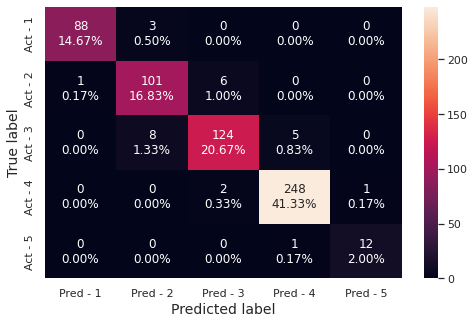

In [110]:
make_confusion_matrix(logreg, y_test)

In [98]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

In [120]:
print("Accuracy Score  : ", accuracy_score(y_test,y_pred))
print("Recall : ",recall_score(y_test,y_pred,average='weighted'))
print("F1 Score: ",round(f1_score(y_test,y_pred,average='weighted'),2))
print("Precision Score : ",round(precision_score(y_test,y_pred,average='weighted'),2))

Accuracy Score  :  0.955
Recall :  0.955
F1 Score:  0.95
Precision Score :  0.96


### **NAIVE BEYES**
**Building the model**

In [123]:
nb_model=GaussianNB()
nb_model.fit(X_train,y_train)

GaussianNB()

**Model Prediction**

In [167]:
y_pred2 = nb_model.predict(X_test)

**Model Evaluation**
```
Confusion Matrix
Accuracy Score
Precision
Recall
F1 Score
```

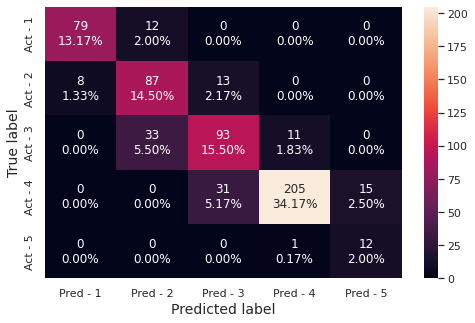

In [127]:
# Confusion matrix
make_confusion_matrix(nb_model, y_test)

In [131]:
print("Accuracy Score  : ", round(accuracy_score(y_test,y_pred2),2))
print("Recall : ",round(recall_score(y_test,y_pred2,average='weighted'),2))
print("F1 Score: ",round(f1_score(y_test,y_pred2,average='weighted'),2))
print("Precision Score : ",round(precision_score(y_test,y_pred2,average='weighted'),2))

Accuracy Score  :  0.79
Recall :  0.79
F1 Score:  0.8
Precision Score :  0.82


### **DECISION TREE**
**Building the model**

In [134]:
dtmodel = DecisionTreeClassifier()

# feeding the training data to the model
dtmodel.fit(X_train, y_train)

DecisionTreeClassifier()

**Model Prediction**

In [168]:
y_pred3 = dtmodel.predict(X_test) 

**Model Evaluation**
```
Confusion Matrix
Accuracy Score
Precision
Recall
F1 Score
```

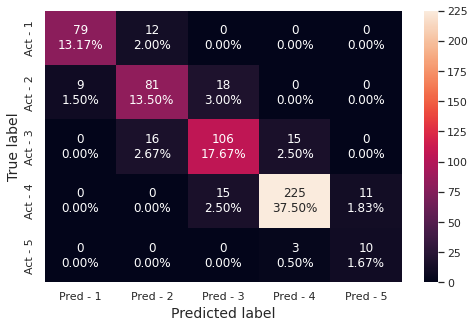

In [136]:
# Confusion matrix
make_confusion_matrix(dtmodel, y_test)

In [137]:
print("Accuracy Score  : ", round(accuracy_score(y_test,y_pred3),2))
print("Recall : ",round(recall_score(y_test,y_pred3,average='weighted'),2))
print("F1 Score: ",round(f1_score(y_test,y_pred3,average='weighted'),2))
print("Precision Score : ",round(precision_score(y_test,y_pred3,average='weighted'),2))

Accuracy Score  :  0.84
Recall :  0.84
F1 Score:  0.84
Precision Score :  0.84


###**RANDOM FOREST**
**Building the model**

In [138]:
rfrmodel = RandomForestClassifier()
rfrmodel = RandomForestClassifier(n_estimators = 30, max_depth = 4, n_jobs = -1)

# feeding the training data to the model
rfrmodel.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, n_estimators=30, n_jobs=-1)

**Model Prediction**

In [169]:
y_pred4 = rfrmodel.predict(X_test) 

**Model Evaluation**
```
Confusion Matrix
Accuracy Score
Precision
Recall
F1 Score
```

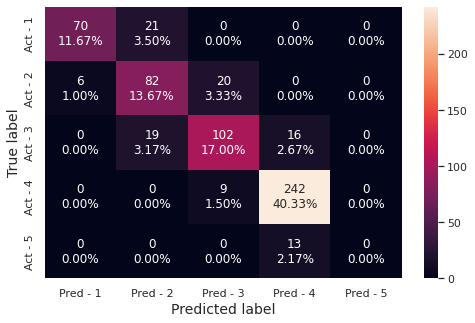

In [141]:
# Confusion matrix
make_confusion_matrix(rfrmodel, y_test)

In [142]:
print("Accuracy Score  : ", round(accuracy_score(y_test,y_pred4),2))
print("Recall : ",round(recall_score(y_test,y_pred4,average='weighted'),2))
print("F1 Score: ",round(f1_score(y_test,y_pred4,average='weighted'),2))
print("Precision Score : ",round(precision_score(y_test,y_pred4,average='weighted'),2))

Accuracy Score  :  0.83
Recall :  0.83
F1 Score:  0.82
Precision Score :  0.81


### **KNN MODEL**
**Building the Model**

In [144]:
from sklearn import neighbors
k=5
# learning the classifier
clf = neighbors.KNeighborsClassifier(k)
clf.fit(X_train, y_train)

KNeighborsClassifier()

**Model prediction** 

In [170]:
y_pred5 = clf.predict(X_test)

**Model Evaluation**
```
Confusion Matrix
Accuracy Score
Precision
Recall
F1 Score
```

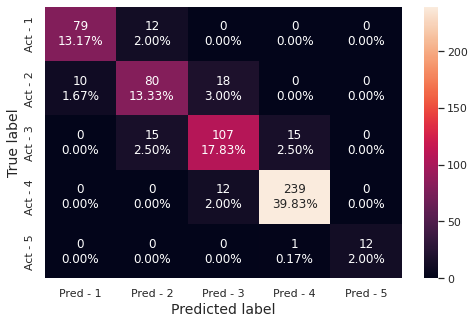

In [147]:
# Confusion matrix
make_confusion_matrix(clf, y_test)

In [153]:
print("Accuracy Score  : ", round(accuracy_score(y_test,y_pred5),2))
print("Recall : ",round(recall_score(y_test,y_pred5,average='weighted'),2))
print("F1 Score: ",round(f1_score(y_test,y_pred5,average='weighted'),2))
print("Precision Score : ",round(precision_score(y_test,y_pred5,average='weighted'),2))

Accuracy Score  :  0.86
Recall :  0.86
F1 Score:  0.86
Precision Score :  0.86


###**Comparing all the models to check whose Accuracy,recall,precision and F1_score is best**

In [272]:
LOG='LOG',round(accuracy_score(y_test,y_pred),2),round(recall_score(y_test,y_pred,average='weighted'),2),round(f1_score(y_test,y_pred,average='weighted'),2),round(precision_score(y_test,y_pred,average='weighted'),2)
NAIVE='NAIVE',round(accuracy_score(y_test,y_pred2),2),round(recall_score(y_test,y_pred2,average='weighted'),2),round(f1_score(y_test,y_pred2,average='weighted'),2),round(precision_score(y_test,y_pred2,average='weighted'),2)
DECISION='DECISION',round(accuracy_score(y_test,y_pred3),2),round(recall_score(y_test,y_pred3,average='weighted'),2),round(f1_score(y_test,y_pred3,average='weighted'),2),round(precision_score(y_test,y_pred3,average='weighted'),2)
RANDOM='RANDOM',round(accuracy_score(y_test,y_pred4),2),round(recall_score(y_test,y_pred4,average='weighted'),2),round(f1_score(y_test,y_pred4,average='weighted'),2),round(precision_score(y_test,y_pred4,average='weighted'),2)
KNN='KNN',round(accuracy_score(y_test,y_pred5),2),round(recall_score(y_test,y_pred5,average='weighted'),2),round(f1_score(y_test,y_pred5,average='weighted'),2),round(precision_score(y_test,y_pred5,average='weighted'),2)


In [276]:
list1=['Model name','Accuracy score','Recall','Precison','F1_Score']

In [277]:
df1=pd.Series(LOG)
df2=pd.Series(NAIVE)
df3=pd.Series(DECISION)
df4=pd.Series(RANDOM)
df5=pd.Series(KNN)
df=pd.Series(list1)

In [278]:
abc = pd.concat([df,df1,df2,df3,df4,df5], axis=1)

In [279]:
abc

,0,1,2,3,4,5
0,Model name,LOG,NAIVE,DECISION,RANDOM,KNN
1,Accuracy score,0.96,0.79,0.84,0.83,0.86
2,Recall,0.96,0.79,0.84,0.83,0.86
3,Precison,0.95,0.8,0.84,0.82,0.86
4,F1_Score,0.96,0.82,0.84,0.81,0.86


###**Conclusion**
We can see that Logistic Regression is having best score among all other models with Accuracy of 96 %